In [1]:
import numpy as np 
from torch.utils.data import DataLoader 
from dataset import XRayDataset 
from utils.ensemble import get_best_model_idx  
from utils.ensemble import get_weighed_ensemble_result 

In [2]:
def customcollatefn(sample):

    img, label = list(zip(*sample))

    img = np.array(img, dtype=np.float32)
    label = np.array(label, dtype=np.float32)

    return img, label

### 전처리가 있는 경우 전처리가 적용된 dataset 따로 만들어 주기 

In [3]:
IMAGE_ROOT = '/opt/ml/input/data/train/DCM'
LABEL_ROOT = '/opt/ml/input/data/train/outputs_json'

fold_num = 1 

dataset = XRayDataset(IMAGE_ROOT, LABEL_ROOT, fold_num=fold_num, is_train='preprocess') 


data_loader = DataLoader(
        dataset=dataset, 
        batch_size=1,
        collate_fn = customcollatefn,
        shuffle=False,
        num_workers=8, # 8
        drop_last=True,
    )

In [4]:
image, label = next(iter(data_loader))
print(image.shape, label.shape)

(1, 3, 1024, 1024) (1, 29, 1024, 1024)


In [5]:
model_paths = [
    '/opt/ml/input/code/saved_model/exp31-1_EfficientUNetpp_from_exp31/epoch003.pth',
] 


best_model_idx_per_class = get_best_model_idx(model_paths, data_loader)

/opt/conda/envs/seg_env-10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 160/160 [01:47<00:00,  1.49it/s]

model 0:  [0.9707309, 0.98366946, 0.9827242, 0.97842026, 0.9790741, 0.98785096, 0.97513914, 0.9800825, 0.9816828, 0.988579, 0.9777807, 0.9789317, 0.9810811, 0.9873813, 0.9791304, 0.97413063, 0.9731714, 0.9846179, 0.9843035, 0.9482109, 0.9217535, 0.9633852, 0.9467106, 0.971902, 0.9610305, 0.9561179, 0.9164918, 0.9882673, 0.98918706]


### 전처리가 없는 일반적인 경우 

In [6]:
IMAGE_ROOT = '/opt/ml/input/data/train/DCM'
LABEL_ROOT = '/opt/ml/input/data/train/outputs_json'

dataset = XRayDataset(IMAGE_ROOT, LABEL_ROOT, fold_num=0, is_train=False) 


data_loader = DataLoader(
        dataset=dataset, 
        batch_size=1,
        collate_fn = customcollatefn,
        shuffle=False,
        num_workers=8, # 8
        drop_last=True,
    )

In [7]:
image, label = next(iter(data_loader))
print(image.shape, label.shape)

(1, 3, 1024, 1024) (1, 29, 1024, 1024)


In [10]:
model_paths = [
    '/opt/ml/input/code/saved_model/exp27_EfficientUNetpp_1024_aug1_customloss/epoch061.pth', 
    '/opt/ml/input/code/saved_model/exp28_HRNet_1024_aug2_customloss_scheduler/epoch060.pth',
    '/opt/ml/input/code/saved_model/exp30_EfficientUNetpp_1024_aug2_customloss_scheduler/epoch061.pth', 
] 

append_dice = [0.9707309, 0.98366946, 0.9827242, 0.97842026, 0.9790741, 0.98785096, 0.97513914, 0.9800825, 0.9816828, 0.988579, 0.9777807, 0.9789317, 0.9810811, 0.9873813, 0.9791304, 0.97413063, 0.9731714, 0.9846179, 0.9843035, 0.9482109, 0.9217535, 0.9633852, 0.9467106, 0.971902, 0.9610305, 0.9561179, 0.9164918, 0.9882673, 0.98918706]

best_model_idx_per_class = get_best_model_idx(model_paths, data_loader, [append_dice])

100%|██████████| 160/160 [01:39<00:00,  1.60it/s]

model 0:  [0.97079515, 0.98248386, 0.9874916, 0.97831595, 0.979218, 0.9879943, 0.9856943, 0.98047864, 0.9826579, 0.9886631, 0.979516, 0.97950745, 0.9817219, 0.98805743, 0.98040074, 0.9755354, 0.9737055, 0.98560584, 0.9859742, 0.9553776, 0.9274744, 0.9695816, 0.95221126, 0.97326314, 0.9619255, 0.95752716, 0.9105574, 0.9907237, 0.9898322]
model 1:  [0.9694475, 0.9836342, 0.9873579, 0.9772402, 0.9779991, 0.98818874, 0.9854518, 0.9794587, 0.98142207, 0.9888018, 0.9795973, 0.97845364, 0.9808276, 0.98764765, 0.9819292, 0.9736927, 0.97312486, 0.985549, 0.9863938, 0.9579217, 0.92916185, 0.9697917, 0.95432013, 0.9732547, 0.9618082, 0.95916903, 0.91410553, 0.9908565, 0.98974115]
model 2:  [0.9715084, 0.9840046, 0.98797095, 0.9785455, 0.97927713, 0.9882873, 0.9851534, 0.9807644, 0.9824297, 0.9890957, 0.97996795, 0.97962683, 0.9814888, 0.98815286, 0.98220766, 0.975445, 0.97365874, 0.98511684, 0.9866268, 0.9558703, 0.92950314, 0.97105247, 0.95380306, 0.9737587, 0.96291906, 0.9579647, 0.9114965, 0.9

In [11]:
best_model_idx_per_class

array([2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 1, 2, 2,
       1, 2, 2, 1, 3, 2, 0])

In [12]:
# ensemble 할 csv 파일 경로
output_paths = [
    '/opt/ml/input/code/saved_model/exp27_EfficientUNetpp_1024_aug1_customloss/epoch061_ouput.csv',
    '/opt/ml/input/code/saved_model/exp28_HRNet_1024_aug2_customloss_scheduler/epoch060_ouput.csv',
    '/opt/ml/input/code/saved_model/exp25_EfficientUNet_1024_aug1_customloss/epoch041_ouput.csv',
    '/opt/ml/input/code/saved_model/exp31-1_EfficientUNetpp_from_exp31/epoch003_ouput.csv' 
] 

save_path = '/opt/ml/ensemble_outputs/weighted_ensemble_output_4.csv'  #### 저장 경로 수정하기 ####


# get_weighed_ensemble_result(output_paths, save_path, best_model_idx_per_class) 
get_weighed_ensemble_result(output_paths, save_path, best_model_idx_per_class, weight=3, thr=3)    

100%|██████████| 300/300 [09:33<00:00,  1.91s/it]



Done!


Text(0.5, 1.0, 'exp27_EfficientUNetpp')

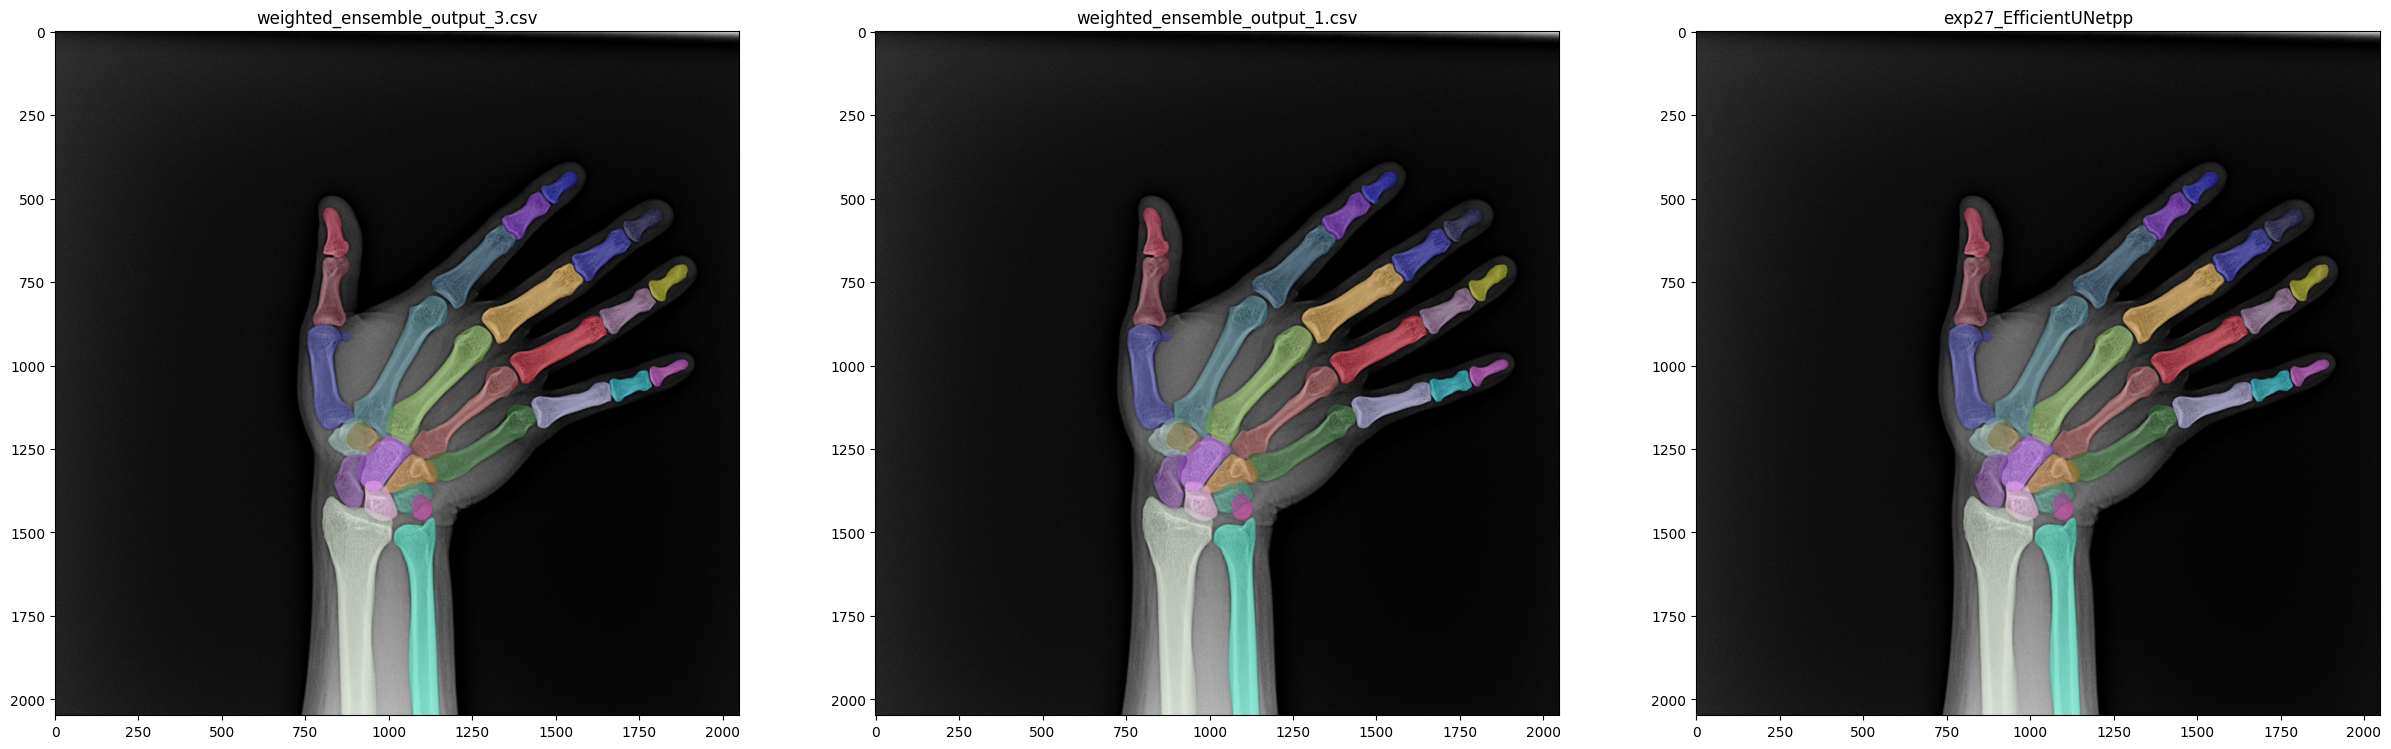

In [15]:
from utils.vis import get_masked_image_from_csv 
from matplotlib import pyplot as plt 

image_path = '/opt/ml/input/data/test/DCM/ID255/image1663723504424.png'
csv_path1 = '/opt/ml/ensemble_outputs/weighted_ensemble_output_3.csv'
csv_path2 = '/opt/ml/ensemble_outputs/weighted_ensemble_output_1.csv'
csv_path3 = '/opt/ml/input/code/saved_model/exp27_EfficientUNetpp_1024_aug1_customloss/epoch061_ouput.csv'

masked_image1 = get_masked_image_from_csv(image_path, csv_path1)
masked_image2 = get_masked_image_from_csv(image_path, csv_path2)
masked_image3 = get_masked_image_from_csv(image_path, csv_path3) 

fig, ax = plt.subplots(1, 3, figsize=(30, 10))
ax[0].imshow(masked_image1) 
ax[0].set_title('weighted_ensemble_output_3.csv')
ax[1].imshow(masked_image2)
ax[1].set_title('weighted_ensemble_output_1.csv') 
ax[2].imshow(masked_image3)
ax[2].set_title('exp27_EfficientUNetpp') 

Text(0.5, 1.0, 'exp27_EfficientUNetpp')

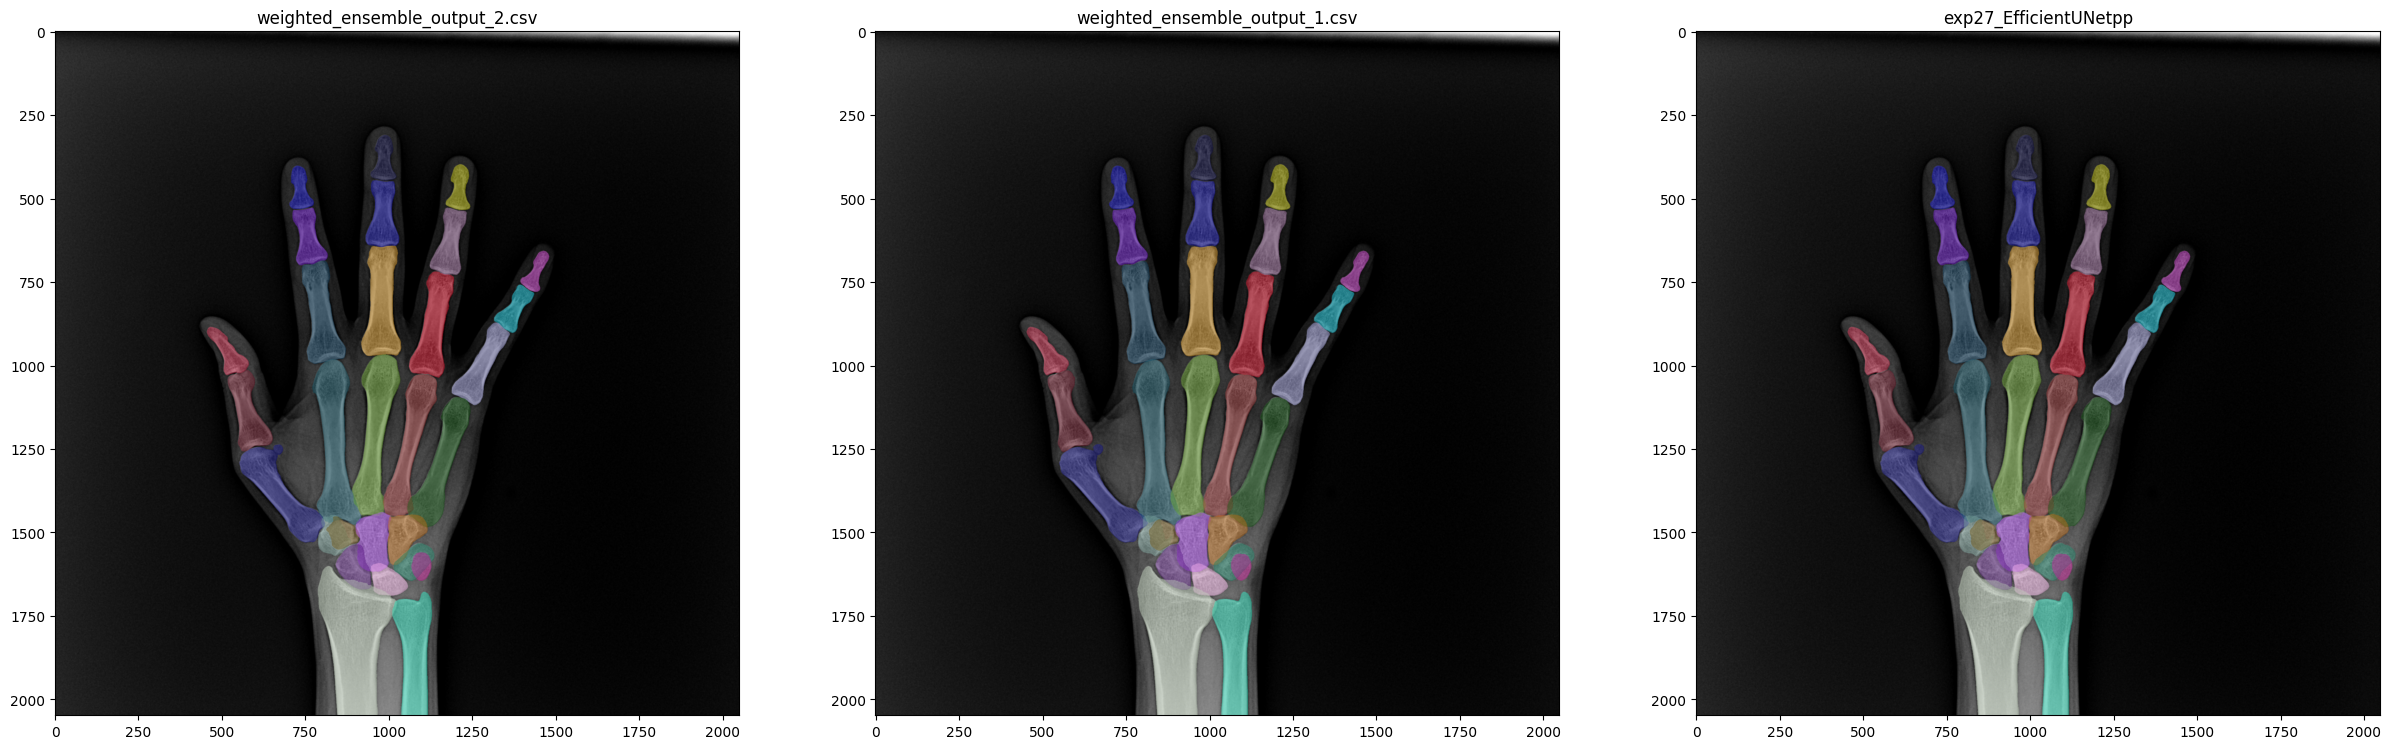

In [13]:
image_path2 = '/opt/ml/input/data/test/DCM/ID040/image1661319116107.png' 

masked_image1 = get_masked_image_from_csv(image_path2, csv_path1)
masked_image2 = get_masked_image_from_csv(image_path2, csv_path2)
masked_image3 = get_masked_image_from_csv(image_path2, csv_path3) 

fig, ax = plt.subplots(1, 3, figsize=(30, 10))
ax[0].imshow(masked_image1) 
ax[0].set_title('weighted_ensemble_output_2.csv')
ax[1].imshow(masked_image2)
ax[1].set_title('weighted_ensemble_output_1.csv') 
ax[2].imshow(masked_image3)
ax[2].set_title('exp27_EfficientUNetpp') 